In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Thu thập dữ liệu

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
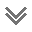

In [109]:
#Web scraping
url = 'https://www.worldometers.info/coronavirus/#countries'
page = requests.get(url,headers= {"Accept-Languges":"en-us"}).text
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

In [110]:
#Lấy dữ liệu bảng
table_data = soup.find('table', id="main_table_countries_today")
table_data

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

In [111]:
table_header = table_data.find_all('th')
table_header

[<th width="1%">#</th>,
 <th width="100">Country,<br>Other</br></th>,
 <th width="20">Total<br>Cases</br></th>,
 <th width="30">New<br>Cases</br></th>,
 <th width="30">Total<br>Deaths</br></th>,
 <th width="30">New<br>Deaths</br></th>,
 <th width="30">Total<br>Recovered</br></th>,
 <th width="30">New<br>Recovered</br></th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [112]:
titles = []
for i in table_header:
    title = i.text
    titles.append(title)
titles

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [113]:
df = pd.DataFrame(columns=titles)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    0 non-null      object
 1   Country,Other        0 non-null      object
 2   TotalCases           0 non-null      object
 3   NewCases             0 non-null      object
 4   TotalDeaths          0 non-null      object
 5   NewDeaths            0 non-null      object
 6   TotalRecovered       0 non-null      object
 7   NewRecovered         0 non-null      object
 8   ActiveCases          0 non-null      object
 9   Serious,Critical     0 non-null      object
 10  Tot Cases/1M pop     0 non-null      object
 11  Deaths/1M pop        0 non-null      object
 12  TotalTests           0 non-null      object
 13  Tests/
1M pop
       0 non-null      object
 14  Population           0 non-null      object
 15  Continent            0 non-null      object
 16  1 Caseevery X ppl   

In [114]:
#Lấy body
table_body = table_data.find('tbody')#.get_text().split('\n')
table_body

<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>131,889,132</td>
<td></td>
<td>1,695,941</td>
<td></td>
<td>127,665,129</td>
<td>+350</td>
<td>2,528,062</td>
<td>6,095</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>221,500,265</td>
<td></td>
<td>1,553,662</td>
<td></td>
<td>205,673,091</td>
<td></td>
<td>14,273,512</td>
<td>14,733</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 

In [115]:
odd_data = table_body.find_all('a', {"class": "mt_a"})

list_country = []
for data in odd_data:
    list_country.append(data.get_text())
list_country

['USA',
 'India',
 'France',
 'Germany',
 'Brazil',
 'S. Korea',
 'Japan',
 'Italy',
 'UK',
 'Russia',
 'Turkey',
 'Spain',
 'Australia',
 'Vietnam',
 'Taiwan',
 'Argentina',
 'Netherlands',
 'Mexico',
 'Iran',
 'Indonesia',
 'Poland',
 'Colombia',
 'Greece',
 'Austria',
 'Portugal',
 'Ukraine',
 'Chile',
 'Malaysia',
 'Canada',
 'Belgium',
 'Israel',
 'DPRK',
 'Thailand',
 'Czechia',
 'Peru',
 'Switzerland',
 'Philippines',
 'South Africa',
 'Romania',
 'Denmark',
 'Singapore',
 'Hong Kong',
 'Sweden',
 'New Zealand',
 'Serbia',
 'Iraq',
 'Hungary',
 'Bangladesh',
 'Slovakia',
 'Georgia',
 'Jordan',
 'Ireland',
 'Pakistan',
 'Finland',
 'Norway',
 'Kazakhstan',
 'Lithuania',
 'Slovenia',
 'Bulgaria',
 'Croatia',
 'Guatemala',
 'Morocco',
 'Lebanon',
 'Costa Rica',
 'Bolivia',
 'Tunisia',
 'Cuba',
 'Ecuador',
 'UAE',
 'Panama',
 'Uruguay',
 'Mongolia',
 'Nepal',
 'Belarus',
 'Latvia',
 'Saudi Arabia',
 'Paraguay',
 'Azerbaijan',
 'Bahrain',
 'Cyprus',
 'Dominican Republic',
 'Sri Lanka

In [116]:
#Lấy các dòng dữ liệu
rows = table_body.find_all('tr')
rows

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>131,889,132</td>
 <td></td>
 <td>1,695,941</td>
 <td></td>
 <td>127,665,129</td>
 <td>+350</td>
 <td>2,528,062</td>
 <td>6,095</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <!-- 1 Case every X -->
 <td>
 </td>
 <!-- 1 Death every X -->
 <td></td>
 <!-- 1 test every X -->
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>221,500,265</td>
 <td></td>
 <td>1,553,662</td>
 <td></td>
 <td>205,673,091</td>
 <td></td>
 <td>14,273,512</td>
 <td>14,733</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>


In [117]:
#fill dataset

for i in rows[1:]:
    data = i.find_all('td')
    row = [tr.text for tr in data]
    l = len(df)
    df.loc[l] = row


In [118]:
df

#      Country,Other   TotalCases NewCases  \
0                  \nAsia\n  221,500,265            
1                \nEurope\n  253,406,198            
2         \nSouth America\n   70,200,879            
3               \nOceania\n   14,895,771            
4                \nAfrica\n   12,860,924            
..   ...                ...          ...      ...   
233  227            Tokelau           80            
234  228       Vatican City           29            
235  229     Western Sahara           10            
236  230         MS Zaandam            9            
237  231              China      503,302            

                               TotalDeaths NewDeaths TotalRecovered  \
0                                1,553,662              205,673,091   
1                                2,101,824              248,754,104   
2                                1,367,332               66,683,585   
3                                   33,015               14,752,388   
4                                  258,892               12,090,808   
..                                     ...       ...            ...   
233                                                                   
234                                                              29   
235      1                                                        9   
236      2                                                        7   
237  5,272                                                  379,053   

    NewRecovered ActiveCases Serious,Critical  ...   TotalTests  \
0                 14,273,512           14,733  ...                
1           +474   2,550,270            4,453  ...                
2                  2,149,962            8,953  ...                
3                    110,368               31  ...                
4                    511,224              529  ...                
..           ...         ...              ...  ...          ...   
233                       80                   ...                
234                        0                   ...                
235                        0                   ...                
236                        0                   ...                
237                  118,977              N/A  ...  160,000,000   

    Tests/\n1M pop\n                                     Population  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     
..               ...                                            ...   
233                                                          1,378    
234                                                            799    
235                                                        626,161    
236                                                                   
237          110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
0                 Asia                \n                                        
1               Europe                \n                                        
2        South America                \n                                        
3    Australia/Oceania                \n                                        
4               Africa                \n                                        
..                 ...               ...                ...               ...   
233  Australia/Oceania                17                                        
234             Europe                28                                        
235             Africa            62,616            626,161                     
236                                              

# Bài Tập

## câu a: Tìm 5 quốc gia có số ca nhiễm (Total case) nhiều nhất.

In [119]:
df.loc[:,'Country,Other'].unique()

array(['\nAsia\n', '\nEurope\n', '\nSouth America\n', '\nOceania\n',
       '\nAfrica\n', '\n\n', 'World', 'USA', 'India', 'France', 'Germany',
       'Brazil', 'S. Korea', 'Japan', 'Italy', 'UK', 'Russia', 'Turkey',
       'Spain', 'Australia', 'Vietnam', 'Taiwan', 'Argentina',
       'Netherlands', 'Mexico', 'Iran', 'Indonesia', 'Poland', 'Colombia',
       'Greece', 'Austria', 'Portugal', 'Ukraine', 'Chile', 'Malaysia',
       'Canada', 'Belgium', 'Israel', 'DPRK', 'Thailand', 'Czechia',
       'Peru', 'Switzerland', 'Philippines', 'South Africa', 'Romania',
       'Denmark', 'Singapore', 'Hong Kong', 'Sweden', 'New Zealand',
       'Serbia', 'Iraq', 'Hungary', 'Bangladesh', 'Slovakia', 'Georgia',
       'Jordan', 'Ireland', 'Pakistan', 'Finland', 'Norway', 'Kazakhstan',
       'Lithuania', 'Slovenia', 'Bulgaria', 'Croatia', 'Guatemala',
       'Morocco', 'Lebanon', 'Costa Rica', 'Bolivia', 'Tunisia', 'Cuba',
       'Ecuador', 'UAE', 'Panama', 'Uruguay', 'Mongolia', 'Nepal',
       

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 237
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    238 non-null    object
 1   Country,Other        238 non-null    object
 2   TotalCases           238 non-null    object
 3   NewCases             238 non-null    object
 4   TotalDeaths          238 non-null    object
 5   NewDeaths            238 non-null    object
 6   TotalRecovered       238 non-null    object
 7   NewRecovered         238 non-null    object
 8   ActiveCases          238 non-null    object
 9   Serious,Critical     238 non-null    object
 10  Tot Cases/1M pop     238 non-null    object
 11  Deaths/1M pop        238 non-null    object
 12  TotalTests           238 non-null    object
 13  Tests/
1M pop
       238 non-null    object
 14  Population           238 non-null    object
 15  Continent            238 non-null    object
 16  1 Caseevery X

In [130]:
tmp = df.iloc[7:]
tmp

#   Country,Other   TotalCases NewCases  \
7      1             USA  111,820,082            
8      2           India   45,035,393            
9      3          France   40,138,560            
10     4         Germany   38,828,995            
11     5          Brazil   38,743,918            
..   ...             ...          ...      ...   
233  227         Tokelau           80            
234  228    Vatican City           29            
235  229  Western Sahara           10            
236  230      MS Zaandam            9            
237  231           China      503,302            

                                   TotalDeaths NewDeaths TotalRecovered  \
7    1,219,487                                              109,814,428   
8      533,570                                                      N/A   
9      167,642                                               39,970,918   
10     183,027                                               38,240,600   
11     711,380                                               36,249,161   
..                                         ...       ...            ...   
233                                                                       
234                                                                  29   
235          1                                                        9   
236          2                                                        7   
237      5,272                                                  379,053   

    NewRecovered ActiveCases Serious,Critical  ...     TotalTests  \
7                    786,167              940  ...  1,186,851,502   
8            N/A         N/A              N/A  ...    935,879,495   
9                          0                   ...    271,490,188   
10                   405,368              N/A  ...    122,332,384   
11                 1,783,377              N/A  ...     63,776,166   
..           ...         ...              ...  ...            ...   
233                       80                   ...                  
234                        0                   ...                  
235                        0                   ...                  
236                        0                   ...                  
237                  118,977              N/A  ...    160,000,000   

    Tests/\n1M pop\n                                     Population  \
7          3,544,901                                   334,805,269    
8            665,334                                 1,406,631,776    
9          4,139,547                                    65,584,518    
10         1,458,359                                    83,883,596    
11           296,146                                   215,353,593    
..               ...                                            ...   
233                                                          1,378    
234                                                            799    
235                                                        626,161    
236                                                                   
237          110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
7        North America                 3                275                 0   
8                 Asia                31              2,636                 2   
9               Europe                 2                391                 0   
10              Europe                 2                458                 1   
11       South America                 6                303                 3   
..                 ...               ...                ...               ...   
233  Australia/Oceania                17                                        
234             Europe                28                                        
235             Africa            62,616            626,161                     
236          

In [131]:
tmp['TotalCases'] = pd.to_numeric(tmp['TotalCases'].str.replace(',', ''), errors='coerce')
tmp

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31584\2756615907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['TotalCases'] = pd.to_numeric(tmp['TotalCases'].str.replace(',', ''), errors='coerce')


#   Country,Other  TotalCases NewCases  \
7      1             USA   111820082            
8      2           India    45035393            
9      3          France    40138560            
10     4         Germany    38828995            
11     5          Brazil    38743918            
..   ...             ...         ...      ...   
233  227         Tokelau          80            
234  228    Vatican City          29            
235  229  Western Sahara          10            
236  230      MS Zaandam           9            
237  231           China      503302            

                                   TotalDeaths NewDeaths TotalRecovered  \
7    1,219,487                                              109,814,428   
8      533,570                                                      N/A   
9      167,642                                               39,970,918   
10     183,027                                               38,240,600   
11     711,380                                               36,249,161   
..                                         ...       ...            ...   
233                                                                       
234                                                                  29   
235          1                                                        9   
236          2                                                        7   
237      5,272                                                  379,053   

    NewRecovered ActiveCases Serious,Critical  ...     TotalTests  \
7                    786,167              940  ...  1,186,851,502   
8            N/A         N/A              N/A  ...    935,879,495   
9                          0                   ...    271,490,188   
10                   405,368              N/A  ...    122,332,384   
11                 1,783,377              N/A  ...     63,776,166   
..           ...         ...              ...  ...            ...   
233                       80                   ...                  
234                        0                   ...                  
235                        0                   ...                  
236                        0                   ...                  
237                  118,977              N/A  ...    160,000,000   

    Tests/\n1M pop\n                                     Population  \
7          3,544,901                                   334,805,269    
8            665,334                                 1,406,631,776    
9          4,139,547                                    65,584,518    
10         1,458,359                                    83,883,596    
11           296,146                                   215,353,593    
..               ...                                            ...   
233                                                          1,378    
234                                                            799    
235                                                        626,161    
236                                                                   
237          110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
7        North America                 3                275                 0   
8                 Asia                31              2,636                 2   
9               Europe                 2                391                 0   
10              Europe                 2                458                 1   
11       South America                 6                303                 3   
..                 ...               ...                ...               ...   
233  Australia/Oceania                17                                        
234             Europe                28                                        
235             Africa            62,616            626,161                     
236                      

In [133]:
tmp = tmp.sort_values(by=['TotalCases'])
tmp

#     Country,Other  TotalCases NewCases  \
236  230        MS Zaandam           9            
235  229    Western Sahara          10            
234  228      Vatican City          29            
233  227           Tokelau          80            
232  226  Diamond Princess         712            
..   ...               ...         ...      ...   
11     5            Brazil    38743918            
10     4           Germany    38828995            
9      3            France    40138560            
8      2             India    45035393            
7      1               USA   111820082            

                                   TotalDeaths NewDeaths TotalRecovered  \
236          2                                                        7   
235          1                                                        9   
234                                                                  29   
233                                                                       
232         13                                                      699   
..                                         ...       ...            ...   
11     711,380                                               36,249,161   
10     183,027                                               38,240,600   
9      167,642                                               39,970,918   
8      533,570                                                      N/A   
7    1,219,487                                              109,814,428   

    NewRecovered ActiveCases Serious,Critical  ...     TotalTests  \
236                        0                   ...                  
235                        0                   ...                  
234                        0                   ...                  
233                       80                   ...                  
232                        0                   ...                  
..           ...         ...              ...  ...            ...   
11                 1,783,377              N/A  ...     63,776,166   
10                   405,368              N/A  ...    122,332,384   
9                          0                   ...    271,490,188   
8            N/A         N/A              N/A  ...    935,879,495   
7                    786,167              940  ...  1,186,851,502   

    Tests/\n1M pop\n      Population          Continent 1 Caseevery X ppl  \
236                                                                         
235                         626,161              Africa            62,616   
234                             799              Europe                28   
233                           1,378   Australia/Oceania                17   
232                                                                         
..               ...             ...                ...               ...   
11           296,146    215,353,593       South America                 6   
10         1,458,359     83,883,596              Europe                 2   
9          4,139,547     65,584,518              Europe                 2   
8            665,334  1,406,631,776                Asia                31   
7          3,544,901    334,805,269       North America                 3   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
236                                                                           
235            626,161                                                        
234                                                                           
233                                                                           
232                                                                           
..                 ...               ...              ...               ...   
11                 303                 3                                      
10                 458                 1                                      
9                  391      

In [136]:
top5 = tmp.tail(5)['Country,Other']

In [137]:
print("Top 5 TotalCase: \n",top5 )

Top 5 TotalCase: 
 11     Brazil
10    Germany
9      France
8       India
7         USA
Name: Country,Other, dtype: object


## Câu b: Quốc gia nào có số ca nhiễm mới cao nhất?

In [138]:
tmp['NewCases'] = pd.to_numeric(tmp['NewCases'].str.replace(',', ''), errors='coerce')
tmp

#     Country,Other  TotalCases  NewCases  \
236  230        MS Zaandam           9       NaN   
235  229    Western Sahara          10       NaN   
234  228      Vatican City          29       NaN   
233  227           Tokelau          80       NaN   
232  226  Diamond Princess         712       NaN   
..   ...               ...         ...       ...   
11     5            Brazil    38743918       NaN   
10     4           Germany    38828995       NaN   
9      3            France    40138560       NaN   
8      2             India    45035393       NaN   
7      1               USA   111820082       NaN   

                                   TotalDeaths NewDeaths TotalRecovered  \
236          2                                                        7   
235          1                                                        9   
234                                                                  29   
233                                                                       
232         13                                                      699   
..                                         ...       ...            ...   
11     711,380                                               36,249,161   
10     183,027                                               38,240,600   
9      167,642                                               39,970,918   
8      533,570                                                      N/A   
7    1,219,487                                              109,814,428   

    NewRecovered ActiveCases Serious,Critical  ...     TotalTests  \
236                        0                   ...                  
235                        0                   ...                  
234                        0                   ...                  
233                       80                   ...                  
232                        0                   ...                  
..           ...         ...              ...  ...            ...   
11                 1,783,377              N/A  ...     63,776,166   
10                   405,368              N/A  ...    122,332,384   
9                          0                   ...    271,490,188   
8            N/A         N/A              N/A  ...    935,879,495   
7                    786,167              940  ...  1,186,851,502   

    Tests/\n1M pop\n      Population          Continent 1 Caseevery X ppl  \
236                                                                         
235                         626,161              Africa            62,616   
234                             799              Europe                28   
233                           1,378   Australia/Oceania                17   
232                                                                         
..               ...             ...                ...               ...   
11           296,146    215,353,593       South America                 6   
10         1,458,359     83,883,596              Europe                 2   
9          4,139,547     65,584,518              Europe                 2   
8            665,334  1,406,631,776                Asia                31   
7          3,544,901    334,805,269       North America                 3   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
236                                                                           
235            626,161                                                        
234                                                                           
233                                                                           
232                                                                           
..                 ...               ...              ...               ...   
11                 303                 3                                      
10                 458                 1                                      
9               

In [148]:
tmp = tmp.sort_values(by=['NewCases'], ascending= False)
tmp

#     Country,Other  TotalCases  NewCases  \
234  228      Vatican City          29       NaN   
229  223  Falkland Islands        1930       NaN   
38    32              DPRK     4772813       NaN   
47    41         Singapore     3006155       NaN   
12     6          S. Korea    34571873       NaN   
..   ...               ...         ...       ...   
27    21            Poland     6661991       NaN   
25    19              Iran     7627186       NaN   
17    11            Turkey    17232066       NaN   
13     7             Japan    33803572       NaN   
8      2             India    45035393       NaN   

                                 TotalDeaths NewDeaths  TotalRecovered  \
234                                                               29.0   
229                                                             1930.0   
38        74                                                 4772739.0   
47     2,024                                                 3004131.0   
12    35,934                                                34535939.0   
..                                       ...       ...             ...   
27   120,598                                                       NaN   
25   146,811                                                       NaN   
17   102,174                                                       NaN   
13    74,694                                                       NaN   
8    533,570                                                       NaN   

    NewRecovered ActiveCases Serious,Critical  ... Tests/\n1M pop\n  \
234                        0                   ...                    
229                        0                   ...        2,439,107   
38                         0                   ...                    
47                         0                4  ...        4,165,302   
12                         0                   ...          307,892   
..           ...         ...              ...  ...              ...   
27           N/A         N/A              N/A  ...        1,041,970   
25           N/A         N/A                   ...          666,338   
17           N/A         N/A              N/A  ...        1,902,052   
13           N/A         N/A              N/A  ...          799,578   
8            N/A         N/A              N/A  ...          665,334   

         Population      Continent 1 Caseevery X ppl 1 Deathevery X ppl  \
234            799          Europe                28                      
229          3,539   South America                 2                      
38      25,990,679            Asia                 5            351,225   
47       5,943,546            Asia                 2              2,937   
12      51,329,899            Asia                 1              1,428   
..              ...            ...               ...                ...   
27      37,739,785          Europe                 6                313   
25      86,022,837            Asia                11                586   
17      85,561,976            Asia                 5                837   
13     125,584,838            Asia                 4              1,681   
8    1,406,631,776            Asia                31              2,636   

    1 Testevery X ppl New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  \
234                                                                            
229                 0                                                          
38                                                                             
47                  0                                                          
12                  3                                                          
..                ...              ...               ...                 ...   
27                  1                                                 31,941   
25                  2                                                  1,199   
17                 

In [151]:
print("Không có quốc gia nào có ca nhiễm mới")

Không có quốc gia nào có ca nhiễm mới


## Câu c: Tính tỉ lệ tổng số ca bình phục trên tổng số ca nhiễm. Xác định 3 quốc gia có tỉ lệ bình phục cao nhất. 

In [143]:
tmp['TotalRecovered'] = pd.to_numeric(tmp['TotalRecovered'].str.replace(',', ''), errors='coerce')

In [144]:
tmp['Recovered/Total'] = tmp['TotalRecovered']/tmp['TotalCases']
tmp

#     Country,Other  TotalCases  NewCases  \
236  230        MS Zaandam           9       NaN   
235  229    Western Sahara          10       NaN   
234  228      Vatican City          29       NaN   
233  227           Tokelau          80       NaN   
232  226  Diamond Princess         712       NaN   
..   ...               ...         ...       ...   
11     5            Brazil    38743918       NaN   
10     4           Germany    38828995       NaN   
9      3            France    40138560       NaN   
8      2             India    45035393       NaN   
7      1               USA   111820082       NaN   

                                   TotalDeaths NewDeaths  TotalRecovered  \
236          2                                                       7.0   
235          1                                                       9.0   
234                                                                 29.0   
233                                                                  NaN   
232         13                                                     699.0   
..                                         ...       ...             ...   
11     711,380                                                36249161.0   
10     183,027                                                38240600.0   
9      167,642                                                39970918.0   
8      533,570                                                       NaN   
7    1,219,487                                               109814428.0   

    NewRecovered ActiveCases Serious,Critical  ... Tests/\n1M pop\n  \
236                        0                   ...                    
235                        0                   ...                    
234                        0                   ...                    
233                       80                   ...                    
232                        0                   ...                    
..           ...         ...              ...  ...              ...   
11                 1,783,377              N/A  ...          296,146   
10                   405,368              N/A  ...        1,458,359   
9                          0                   ...        4,139,547   
8            N/A         N/A              N/A  ...          665,334   
7                    786,167              940  ...        3,544,901   

         Population          Continent 1 Caseevery X ppl 1 Deathevery X ppl  \
236                                                                           
235        626,161              Africa            62,616            626,161   
234            799              Europe                28                      
233          1,378   Australia/Oceania                17                      
232                                                                           
..              ...                ...               ...                ...   
11     215,353,593       South America                 6                303   
10      83,883,596              Europe                 2                458   
9       65,584,518              Europe                 2                391   
8    1,406,631,776                Asia                31              2,636   
7      334,805,269       North America                 3                275   

    1 Testevery X ppl New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  \
236                                                                            
235                                                                            
234                                                                            
233                                                                   58,055   
232                                                                            
..                ...              ...               ...                 ...   
11                  3                                                  8,281   
10                  1      

In [146]:
tmp = tmp.sort_values(by=['Recovered/Total'], ascending= False)
tmp

#     Country,Other  TotalCases  NewCases  \
234  228      Vatican City          29       NaN   
229  223  Falkland Islands        1930       NaN   
38    32              DPRK     4772813       NaN   
47    41         Singapore     3006155       NaN   
12     6          S. Korea    34571873       NaN   
..   ...               ...         ...       ...   
27    21            Poland     6661991       NaN   
25    19              Iran     7627186       NaN   
17    11            Turkey    17232066       NaN   
13     7             Japan    33803572       NaN   
8      2             India    45035393       NaN   

                                 TotalDeaths NewDeaths  TotalRecovered  \
234                                                               29.0   
229                                                             1930.0   
38        74                                                 4772739.0   
47     2,024                                                 3004131.0   
12    35,934                                                34535939.0   
..                                       ...       ...             ...   
27   120,598                                                       NaN   
25   146,811                                                       NaN   
17   102,174                                                       NaN   
13    74,694                                                       NaN   
8    533,570                                                       NaN   

    NewRecovered ActiveCases Serious,Critical  ... Tests/\n1M pop\n  \
234                        0                   ...                    
229                        0                   ...        2,439,107   
38                         0                   ...                    
47                         0                4  ...        4,165,302   
12                         0                   ...          307,892   
..           ...         ...              ...  ...              ...   
27           N/A         N/A              N/A  ...        1,041,970   
25           N/A         N/A                   ...          666,338   
17           N/A         N/A              N/A  ...        1,902,052   
13           N/A         N/A              N/A  ...          799,578   
8            N/A         N/A              N/A  ...          665,334   

         Population      Continent 1 Caseevery X ppl 1 Deathevery X ppl  \
234            799          Europe                28                      
229          3,539   South America                 2                      
38      25,990,679            Asia                 5            351,225   
47       5,943,546            Asia                 2              2,937   
12      51,329,899            Asia                 1              1,428   
..              ...            ...               ...                ...   
27      37,739,785          Europe                 6                313   
25      86,022,837            Asia                11                586   
17      85,561,976            Asia                 5                837   
13     125,584,838            Asia                 4              1,681   
8    1,406,631,776            Asia                31              2,636   

    1 Testevery X ppl New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  \
234                                                                            
229                 0                                                          
38                                                                             
47                  0                                                          
12                  3                                                          
..                ...              ...               ...                 ...   
27                  1                                                 31,941   
25                  2                                                  1,199   
17                 

In [147]:
top3 = tmp.head(3)['Country,Other']
top3

234        Vatican City
229    Falkland Islands
38                 DPRK
Name: Country,Other, dtype: object